In [47]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = r'D:\Learning\Flowers classification\dataset\preprocessed_data\train'
valid_data_dir = r'D:\Learning\Flowers classification\dataset\preprocessed_data\val'
test_data_dir = r'D:\Learning\Flowers classification\dataset\preprocessed_data\test'

In [8]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  validation_split=0.4)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_height, img_width),
                                                   batch_size= batch_size,
                                                   class_mode='categorical',
                                                   subset='training')
valid_generator = train_datagen.flow_from_directory(valid_data_dir,
                                                   target_size=(img_height, img_width),
                                                   batch_size= batch_size,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 1557 images belonging to 5 classes.
Found 342 images belonging to 5 classes.


In [9]:
test_generator = train_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size= 1,
                                                  class_mode='categorical',
                                                  subset='validation')

Found 347 images belonging to 5 classes.


In [10]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [12]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs= base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs = 10)

C:\Users\abhir\anaconda3\envs\image_clf\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 532s 6us/step
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/10
49/49 [==============================] - 250s 5s/step - loss: 0.8178 - acc: 0.7566
Epoch 2/10
49/49 [==============================] - 248s 5s/step - loss: 0.2870 - acc: 0.8953
Epoch 3/10
49/49 [==============================] - 250s 5s/step - loss: 0.2603 - acc: 0.9062
Epoch 4/10
49/49 [==============================] - 251s 5s/step - loss: 0.1963 - acc: 0.9287
Epoch 5/10
49/49 [==============================] - 250s 5s/step - loss: 0.1483 - acc: 0.9480
Epoch 6/10
49/49 [==============================] - 254s 5s/step - loss: 0.1380 - acc: 0.9473
Epoch 7/10
49/49 [==============================] - 257s 5s/step - loss: 0.1047 - acc: 0.9634
Epoch 8/10
49/49 [==============================] - 204s 4s/step - loss: 0.0947 - acc: 0.9672
Epoch 9/10
49/49 [==============================] - 202s 4s/ste

In [13]:
model.save(r'D:\Learning\Flowers classification\saved_model\Resnet50_classification.h5')

In [14]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

print('\nTest Accuracy: ', test_acc)

347/347 - 24s - loss: 0.7867 - acc: 0.8012

Test Accuracy:  0.80115277


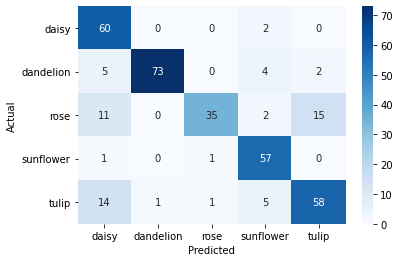

test_accuracy : 81.55619596541787


In [17]:
import pandas as pd
import seaborn as sns
import tensorflow as tf

model = tf.keras.models.load_model(r'D:\Learning\Flowers classification\saved_model\Resnet50_classification.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob = []
y_act = []
test_generator.reset()

for _ in range(nb_samples):
    x_test, y_test = test_generator.next()
    y_prob.append(model.predict(x_test))
    y_act.append(y_test)
    
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, cmap='Blues',annot=True, fmt='d')
plt.show()
print('test_accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [124]:
model = tf.keras.models.load_model(r'D:\Learning\Flowers classification\saved_model\Resnet50_classification.h5')

In [118]:
from tensorflow.keras.preprocessing import image
img_path = (r'D:\Learning\Flowers classification\test2.jpg')
img = image.load_img(img_path, target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


In [119]:
preds = model.predict(x)

In [120]:
preds

array([[1.4759691e-07, 3.4747116e-12, 9.9999988e-01, 4.7497668e-08,
        1.2098957e-08]], dtype=float32)

In [123]:
label = decode_prediction(preds) 

[('n01484850', 'rose', 0.9999999), ('n01440764', 'daisy', 1.4759691e-07), ('n01491361', 'sunflower', 4.7497668e-08), ('n01494475', 'tulip', 1.2098957e-08), ('n01443537', 'dandelion', 3.4747116e-12)]


In [127]:
final_preds=[]
for i in label[0]:
    t={}
    t['id']=i[0]
    t['class']=i[1]
    t['confidence']=float(i[2])
    final_preds.append(t)
    
    
print(final_preds)

[{'id': 'n01484850', 'class': 'rose', 'confidence': 0.9999998807907104}, {'id': 'n01440764', 'class': 'daisy', 'confidence': 1.475969071407235e-07}, {'id': 'n01491361', 'class': 'sunflower', 'confidence': 4.749766802092381e-08}, {'id': 'n01494475', 'class': 'tulip', 'confidence': 1.2098957391515341e-08}, {'id': 'n01443537', 'class': 'dandelion', 'confidence': 3.4747116208627693e-12}]
